In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("/content/Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.drop('CustomerID',axis=1,inplace=True)

In [5]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
data.isnull().sum().sum()

0

In [7]:
data['Gender'] = pd.Categorical(data['Gender'])
data['Gender'] = data['Gender'].cat.codes

In [8]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [9]:
X=data.drop('Spending Score (1-100)',axis=1)

In [10]:
y = data['Spending Score (1-100)']

In [11]:
cluster1 = []
for i in range(1,10):
  k = KMeans(n_clusters = i)
  k.fit(X)
  cluster1.append(k.inertia_)
cluster1

[176158.06,
 87170.74887218044,
 59541.70598265832,
 39551.60942422728,
 31707.780070267778,
 26359.545833333334,
 21888.335256410257,
 18887.544129807393,
 16121.653007483592]

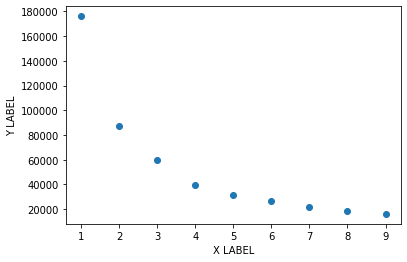

In [12]:
plt.scatter(range(1,10),cluster1)
plt.xlabel('X LABEL')
plt.ylabel('Y LABEL')
plt.show()

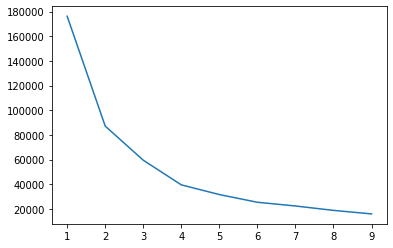

In [13]:
dist=[]
k = range(1,10)
for i in k:
  kmodel = KMeans(n_clusters= i)
  kmodel.fit(X)
  dist.append(kmodel.inertia_)
dist
plt.plot(k,dist)
plt.show()

In [14]:
kms = KMeans(n_clusters=4)
kms.fit(X,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
label = kms.predict(X,y)

In [16]:
kms.cluster_centers_.shape

(4, 3)

In [17]:
kms.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

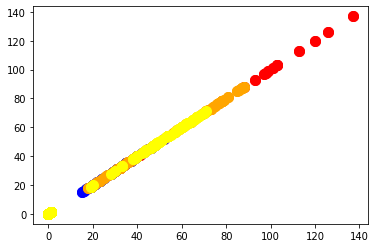

In [18]:
plt.scatter(X[kms.predict(X)==0],X[kms.predict(X) ==0],s = 100, c = 'red')
plt.scatter(X[kms.predict(X)==1],X[kms.predict(X) ==1],s = 100, c = 'blue')
plt.scatter(X[kms.predict(X)==2],X[kms.predict(X) ==2],s = 100, c = 'orange')
plt.scatter(X[kms.predict(X)==3],X[kms.predict(X) ==3],s = 100, c = 'yellow')


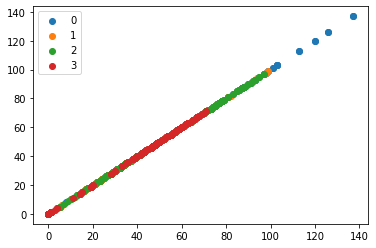

In [21]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(data[label == i ] , data[label == i ] , label = i)
plt.legend()
plt.show()

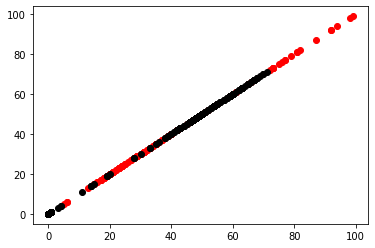

In [26]:
filtered_label1 = data[label == 1]
 
filtered_label3 = data[label == 3]
 
#Plotting the results
plt.scatter(filtered_label1[:] , filtered_label1[:] , color = 'red')
plt.scatter(filtered_label3[:] , filtered_label3[:] , color = 'black')
plt.show()